# Исследование надежности заемщиков


Во второй части проекта вы выполните шаги 3 и 4. Их вручную проверит ревьюер.
Чтобы вам не пришлось писать код заново для шагов 1 и 2, мы добавили авторские решения в ячейки с кодом. 



## Откройте таблицу и изучите общую информацию о данных

**Задание 1. Импортируйте библиотеку pandas. Считайте данные из csv-файла в датафрейм и сохраните в переменную `data`. Путь к файлу:**

`/datasets/data.csv`

In [2]:
import pandas as pd

try:
    data = pd.read_csv('/datasets/data.csv')
except:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/data.csv')

**Задание 2. Выведите первые 20 строчек датафрейма `data` на экран.**

In [3]:
data.head(20)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу
5,0,-926.185831,27,высшее,0,гражданский брак,1,M,компаньон,0,255763.565419,покупка жилья
6,0,-2879.202052,43,высшее,0,женат / замужем,0,F,компаньон,0,240525.971920,операции с жильем
7,0,-152.779569,50,СРЕДНЕЕ,1,женат / замужем,0,M,сотрудник,0,135823.934197,образование
8,2,-6929.865299,35,ВЫСШЕЕ,0,гражданский брак,1,F,сотрудник,0,95856.832424,на проведение свадьбы
9,0,-2188.756445,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425.938277,покупка жилья для семьи


**Задание 3. Выведите основную информацию о датафрейме с помощью метода `info()`.**

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


## Предобработка данных

### Удаление пропусков

**Задание 4. Выведите количество пропущенных значений для каждого столбца. Используйте комбинацию двух методов.**

In [5]:
data.isna().sum()

children               0
days_employed       2174
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income        2174
purpose                0
dtype: int64

**Задание 5. В двух столбцах есть пропущенные значения. Один из них — `days_employed`. Пропуски в этом столбце вы обработаете на следующем этапе. Другой столбец с пропущенными значениями — `total_income` — хранит данные о доходах. На сумму дохода сильнее всего влияет тип занятости, поэтому заполнить пропуски в этом столбце нужно медианным значением по каждому типу из столбца `income_type`. Например, у человека с типом занятости `сотрудник` пропуск в столбце `total_income` должен быть заполнен медианным доходом среди всех записей с тем же типом.**

In [6]:
for t in data['income_type'].unique():
    data.loc[(data['income_type'] == t) & (data['total_income'].isna()), 'total_income'] = \
    data.loc[(data['income_type'] == t), 'total_income'].median()

### Обработка аномальных значений

**Задание 6. В данных могут встречаться артефакты (аномалии) — значения, которые не отражают действительность и появились по какой-то ошибке. таким артефактом будет отрицательное количество дней трудового стажа в столбце `days_employed`. Для реальных данных это нормально. Обработайте значения в этом столбце: замените все отрицательные значения положительными с помощью метода `abs()`.**

In [7]:
data['days_employed'] = data['days_employed'].abs()

**Задание 7. Для каждого типа занятости выведите медианное значение трудового стажа `days_employed` в днях.**

In [8]:
data.groupby('income_type')['days_employed'].agg('median')

income_type
безработный        366413.652744
в декрете            3296.759962
госслужащий          2689.368353
компаньон            1547.382223
пенсионер          365213.306266
предприниматель       520.848083
сотрудник            1574.202821
студент               578.751554
Name: days_employed, dtype: float64

У двух типов (безработные и пенсионеры) получатся аномально большие значения. Исправить такие значения сложно, поэтому оставьте их как есть.

**Задание 8. Выведите перечень уникальных значений столбца `children`.**

In [9]:
data['children'].unique()

array([ 1,  0,  3,  2, -1,  4, 20,  5])

**Задание 9. В столбце `children` есть два аномальных значения. Удалите строки, в которых встречаются такие аномальные значения из датафрейма `data`.**

In [10]:
data = data[(data['children'] != -1) & (data['children'] != 20)]

**Задание 10. Ещё раз выведите перечень уникальных значений столбца `children`, чтобы убедиться, что артефакты удалены.**

In [11]:
data['children'].unique()

array([1, 0, 3, 2, 4, 5])

### Удаление пропусков (продолжение)

**Задание 11. Заполните пропуски в столбце `days_employed` медианными значениями по каждого типа занятости `income_type`.**

In [12]:
for t in data['income_type'].unique():
    data.loc[(data['income_type'] == t) & (data['days_employed'].isna()), 'days_employed'] = \
    data.loc[(data['income_type'] == t), 'days_employed'].median()

**Задание 12. Убедитесь, что все пропуски заполнены. Проверьте себя и ещё раз выведите количество пропущенных значений для каждого столбца с помощью двух методов.**

In [13]:
data.isna().sum()

children            0
days_employed       0
dob_years           0
education           0
education_id        0
family_status       0
family_status_id    0
gender              0
income_type         0
debt                0
total_income        0
purpose             0
dtype: int64

### Изменение типов данных

**Задание 13. Замените вещественный тип данных в столбце `total_income` на целочисленный с помощью метода `astype()`.**

In [14]:
data['total_income'] = data['total_income'].astype(int)

### Обработка дубликатов

**Задание 14. Обработайте неявные дубликаты в столбце `education`. В этом столбце есть одни и те же значения, но записанные по-разному: с использованием заглавных и строчных букв. Приведите их к нижнему регистру.**

In [15]:
data['education'] = data['education'].str.lower()

**Задание 15. Выведите на экран количество строк-дубликатов в данных. Если такие строки присутствуют, удалите их.**

In [16]:
data.duplicated().sum()

71

In [17]:
data = data.drop_duplicates()

### Категоризация данных

**Задание 16. На основании диапазонов, указанных ниже, создайте в датафрейме `data` столбец `total_income_category` с категориями:**

- 0–30000 — `'E'`;
- 30001–50000 — `'D'`;
- 50001–200000 — `'C'`;
- 200001–1000000 — `'B'`;
- 1000001 и выше — `'A'`.


**Например, кредитополучателю с доходом 25000 нужно назначить категорию `'E'`, а клиенту, получающему 235000, — `'B'`. Используйте собственную функцию с именем `categorize_income()` и метод `apply()`.**

In [18]:
def categorize_income(income):
    try:
        if 0 <= income <= 30000:
            return 'E'
        elif 30001 <= income <= 50000:
            return 'D'
        elif 50001 <= income <= 200000:
            return 'C'
        elif 200001 <= income <= 1000000:
            return 'B'
        elif income >= 1000001:
            return 'A'
    except:
        pass

In [19]:
data['total_income_category'] = data['total_income'].apply(categorize_income)

**Задание 17. Выведите на экран перечень уникальных целей взятия кредита из столбца `purpose`.**

In [20]:
data['purpose'].unique()

array(['покупка жилья', 'приобретение автомобиля',
       'дополнительное образование', 'сыграть свадьбу',
       'операции с жильем', 'образование', 'на проведение свадьбы',
       'покупка жилья для семьи', 'покупка недвижимости',
       'покупка коммерческой недвижимости', 'покупка жилой недвижимости',
       'строительство собственной недвижимости', 'недвижимость',
       'строительство недвижимости', 'на покупку подержанного автомобиля',
       'на покупку своего автомобиля',
       'операции с коммерческой недвижимостью',
       'строительство жилой недвижимости', 'жилье',
       'операции со своей недвижимостью', 'автомобили',
       'заняться образованием', 'сделка с подержанным автомобилем',
       'получение образования', 'автомобиль', 'свадьба',
       'получение дополнительного образования', 'покупка своего жилья',
       'операции с недвижимостью', 'получение высшего образования',
       'свой автомобиль', 'сделка с автомобилем',
       'профильное образование', 'высшее об

**Задание 18. Создайте функцию, которая на основании данных из столбца `purpose` сформирует новый столбец `purpose_category`, в который войдут следующие категории:**

- `'операции с автомобилем'`,
- `'операции с недвижимостью'`,
- `'проведение свадьбы'`,
- `'получение образования'`.

**Например, если в столбце `purpose` находится подстрока `'на покупку автомобиля'`, то в столбце `purpose_category` должна появиться строка `'операции с автомобилем'`.**

**Используйте собственную функцию с именем `categorize_purpose()` и метод `apply()`. Изучите данные в столбце `purpose` и определите, какие подстроки помогут вам правильно определить категорию.**

In [21]:
def categorize_purpose(row):
    try:
        if 'автом' in row:
            return 'операции с автомобилем'
        elif 'жил' in row or 'недвиж' in row:
            return 'операции с недвижимостью'
        elif 'свад' in row:
            return 'проведение свадьбы'
        elif 'образов' in row:
            return 'получение образования'
    except:
        return 'нет категории'

In [22]:
data['purpose_category'] = data['purpose'].apply(categorize_purpose)

### Шаг 3. Исследуйте данные и ответьте на вопросы

#### 3.1 Есть ли зависимость между количеством детей и возвратом кредита в срок?

In [23]:
#сгруппируем данные о должниках по столбцу 'children'. 0 - нет долга, 1 - долг
#data_grouped_children = data.groupby(['children', 'debt']).agg({'debt':'count'})
#data_grouped_children

In [24]:
#вычислим количество должников в процентах с детьми в каждой категории от общего числа должников-заемщиков
#data_grouped_children['debt_percent'] = data_grouped_children['debt']/data['debt'].count()*100
#data_grouped_children

**Вывод:**  Наблюдаем тенденцию уменьшения количества должников с увеличением количества детей. То есть, на поставленный вопрос можно ответить утвердительно: да, зависимость возврата кредита в срок от количества детей есть. На первый взгляд хочется сделать вывод, что многодетным семьям стоит доверять больше.

Однако, мы видим, что процент заемщиков уменьшается с увеличением количества детей. Также можно оценить процент должников внутри каждой категории. 

- 65% займов взяли люди, не имеющие детей, из которых 7.7% (5/(61+5)) имеют плохую кредитную историю 
- 22.5% займов взяли люди с 1 ребенком, из которых 10% имеют плохую кредитную историю
- 10% займов взяли люди с 2 детьми, из которых 10% имеют плохую кредитную историю
- 1,5% займов взяли люди с 3 детьми, из которых 9% имеют плохую кредитную историю
- 0.2% займов взяли люди с 4 детьми, из которых 10% имеют плохую кредитную историю
- 0.04% займов взяли люди с 5 детьми, из которых 0% имеют плохую кредитную историю

Внутри каждой категории мы видим, что процент должников составляет 8-10%, причем у бездетных этот показатель самый маленький. Поэтому можно сказать, что чем больше детей, тем реже люди берут займы, а должников внутри каждой категории примерно одинаково. 

<div class="alert alert-danger">
<b>Необходимо исправить ❌</b>

**Наблюдаем тенденцию уменьшения количества должников с увеличением количества детей. То есть, на поставленный вопрос можно ответить утвердительно: да, зависимость возврата кредита в срок от количества детей есть. На первый взгляд хочется сделать вывод, что многодетным семьям стоит доверять больше** - это неверный вывод. И в первую очередь он неверен потому, что твой метод расчета не дает понять тенденции в данных одним взглядом.
</div>

<div class="alert alert-warning">
<b>Комментарий 👉</b>

Давай вот что попытаемся сделать на 2ой итерации: groupby (или pivot_table) здесь ключ к ответу на вопрос буквально в 2 строки.
    
Напишу словами, а ты попытайся на следующей итерации сделать это. Итак, 
    
1. (первая строка кода) группируешь детей (children) по столбцу долг (debt) 
    
2. агрегируешь долг по 2м функциям sum (здесь будут задолженники по соответствующей группе) и count (здесь будут все взявшие кредит в этой группе)
    
3. (вторая строка кода) делишь должников в группе - на «всех в группе»: получаешь процент задолжников
    
Сравниваешь проценты, пишешь вывод.    
</div>


<div style="background: #B0E0E6; padding: 5px; border: 1px solid SteelBlue; border-radius: 5px;">
    <font color='4682B4'><u><b>КОММЕНТАРИЙ СТУДЕНТА</b></u></font>
    <br />
    <font color='4682B4'> Александр, я поняла свою ошибку, ушла немного в другую сторону в своих размышлениях. Действительно, лучше, когда сводная таблица четко и наглядно отражает ответ на поставленный вопрос. Теперь стало яснее, как должен выглядеть ход мыслей и рабочий отчет аналитика данных. Я надеюсь, что в следующем проекте не придется столько исправлять.     

In [25]:
data_pivot_children = data.pivot_table(index='children', values = 'debt', aggfunc = ['sum', 'count'])
data_pivot_children['debt_percent']=data_pivot_children['sum']/data_pivot_children['count']*100
data_pivot_children.sort_values(by='debt_percent',ascending=False)

,sum,count,debt_percent
,debt,debt,
children,,,
4,4,41,9.756098
2,194,2052,9.454191
1,444,4808,9.234609
3,27,330,8.181818
0,1063,14091,7.543822
5,0,9,0.000000


<div class="alert alert-success">
<b>КОММЕНТАРИЙ V2</b>



Расчет показателя "% должников по группам заемщиков" выполнен верно, молодец. Здесь у тебя всё хорошо ещё и в том смысле, что ты применяешь методы группировки данных/сводные таблицы (а не используешь расчет "в лоб", используя .loc() <- такое к сожалению иногда встречается в работах коллег). Это самый простой и типичный способ консолидации данных и представления их в виде пригодном для анализа и формирования выводов.

Рекомендую эту ссылку (по дальнейшему совешенствованию в pibvot_table/groupby): https://dfedorov.spb.ru/pandas
</div>

<div class="alert alert-success">
<b>КОММЕНТАРИЙ V2</b>



Здесь у тебя абсолютно верное решение. Но покажу вариант для нашего случая ещё более короткий, фактически "однострочник". 
    
Суть его основана вот на чём: если у нас есть бинарная переменная, здесь это debt, которая принимает значение 1-должник, 0-не должник, то sum по debt будет является количеством должников в группе, а count по debt - общим количеством заемщиков в этой группе. Как узнать % должников? Очевидно, что разделить sum на count, что ты собственно и делаешь. Но смотри, отношение sum к count (это из школьной математики следует) есть ..... среднее, то есть mean, поэтому наш "однострочник" выглядит так:

      data.groupby('children')['debt'].mean()

Положа руку на сердце мой вариант он скорее красивый, чем практичный. Дело в том, что и sum и count и mean - каждая из этих функций агрегации дает необходимую для принятия решения о структуре наших данных информацию. Поэтому в реальном проекте я бы не пользовался этой "красотой". Вот такой вариант - он более предпочтительный:

      data.groupby('children')['debt'].agg(['sum', 'count', 'mean'])
</div>


<div style="background: #B0E0E6; padding: 5px; border: 1px solid SteelBlue; border-radius: 5px;">
    <font color='4682B4'><u><b>Новый вывод: </b></u></font>

На основании вычислений, наблюдаем следующую закономерность:
    
- должники с одним ребенком составляют 9,3%
- должники с тремя детьми составляют 8,2%    
- должники без детей составляют 7,5%
    
В категории заемщиков с 4 и 5 детьми для проведения более точного исследования требуется больше входных данных.
   
 

<div class="alert alert-success">
<b>КОММЕНТАРИЙ V2</b>



Да, конечно «разбег» между "цифрами" в наших данных мал. **Возможно**, что в рамках имеющихся данных сделать вывод о том, что семьи с детьми относительно семей без оных имеют какие-то задержки в выплатах кредитов нельзя. Слишком уж близки доли, чуть измениться выборка и значения могут измениться в другую сторону. То есть можно сделать вывод, что сколь угодно значимой разницы между группами нет ... однако учти, что даже небольшие разницы могут существенно сказываться на кредитном портфеле банка. Например, наш банк в год выдает кредитов на 100.000.000.000 (сто миллиардов) рублей. В какую сумму выльется разница в 1,9%, если мы выдадим кредит не той аудитории? Значимая разница в деньгах?

Однако, если считать, что **любая** разница между группами есть повод для «разделения» классов, то я бы сделал такой вывод: кредитополучатели без детей являются более ответственными, чем клиенты, у которых есть дети. Видимо, наличие ребенка накладывает на клиента дополнительные финансовое бремя (обязательства) и клиенты либо менее ответственно относятся к своим кредитным обязательствам, либо не имеют возможности в срок оплачивать обязательства.

Ну и что ещё можно увидеть в наших данных (агрегация «по count» в этом может помочь), то, что по некоторым группам заемщиков у нас недостаточно данных. Говорят, что выборка не сбалансирована, классы в выборке имеют разные размеры.

P.S. И вот ещё какой важный момент – да, на больших суммах и маленькие доли процента выльются в значительные объемы. Но вообще, насколько я понимаю логику кредитного бизнеса, дело не в том, чтобы кому-то не давать денег, а в том, чтобы компенсировать риск выдачи кредитным процентом. То есть, потенциальный должник заплатит более высокий процент за использование кредита. Так что в этой задаче фактически рассматривается вопрос - повышать ли процент заемщику с детьми. И статистика, которая показывает, что человек с 4 детьми просрочит выплату примерно так же, как и с двумя, - она, на мой взгляд, не обосновывает ужесточение кредитных условий для семей с детьми. К тому же тут зафиксировано количество детей только на момент выдачи кредита, никто не гарантирует, что их не станет больше в течение срока выплаты. Таким образом из этих данных можно сделать скорее другой вывод: кредитный портфель бездетных (со сроками выданных кредитов по несколько лет) скорее всего со временем ухудшится по показателю возврата денег (какая-то часть бездетных заведут детей, и у них должников из 7,5% станет 9%). И тогда этот риск можно было бы закладывать заранее (но для этого хорошо было бы понимать, сколько бездетных перейдут в категорию «с детьми» в течение 5 лет, например).
</div>

<div class="alert alert-success">
<b>КОММЕНТАРИЙ V2</b>

**В категории заемщиков с 4 и 5 детьми для проведения более точного исследования требуется больше входных данных** - в категории с 4мя детьми, с "натяжкой" данных уже хватает ....
    
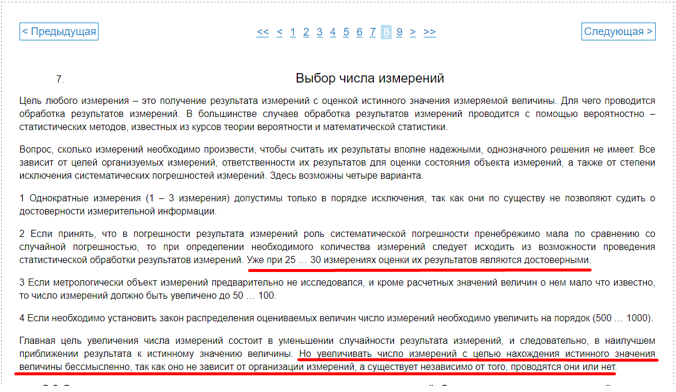    
</div>

#### 3.2 Есть ли зависимость между семейным положением и возвратом кредита в срок?

In [26]:
#сгруппируем данные о должниках по столбцу 'family_status'. 0 - нет долга, 1 - долг
#data_grouped_status = data.groupby(['family_status', 'debt']).agg({'debt':'count'})
#data_grouped_status

In [27]:
#вычислим количество должников в процентах в зависимости от семейного положения от общего числа должников-заемщиков 
#и отсортируем по убыванию
#data_grouped_status['debt_percent'] = data_grouped_status['debt']/data['debt'].count()*100
#data_grouped_status.sort_values(by='debt_percent',ascending=False)

**Вывод:** Самый большой процент должников (4,3%) в категории "женат/замужем", а самый маленький - у разведенных (0,4%) и вдовых (0,3%). Однако, как и в предыдущем выводе было бы корректно проанализировать процентное распределение займов по категориям и соотношение должников/недолжников внутри каждой категории:

- "женат/замужем" взяли 57% всех займов, внутри данной категории 7,5% должников (4,3 / (53,1 + 4,3))
- "гражданский брак" взяли 19,4% всех займов, внутри категории 9% должников
- "не женат/не замужем" взяли 13,1% всех займов, внутри категории 7% должников
- "в разводе" взяли 5,6% всех займов, внутри категории 7% должников
- "вдова/вдовец" взяли 4,5% всех займов, внутри категории 7% должников

Таким образом видим, что больше всего долгов в категории ("женат/замужем"), в которой взяли больше всего займов (>50%), а меньше всего долгов в категориях "в разводе" и "вдова/вдовец", которы взяли примерно по 5% займов от общего количества. 

При этом, если рассматривать каждую категорию отдельно, то внутри каждой категории стабильно 7% должников, чуть больше (9%) в категории "гражданский брак". 

<div class="alert alert-danger">
<b>Необходимо исправить ❌</b>

**видим, что больше всего долгов в категории ("женат/замужем")** - нет, увы. Пробуй расчет описаный выше.
</div>

In [28]:
data_pivot_status = data.pivot_table(index='family_status', values = 'debt', aggfunc = ['sum', 'count'])
data_pivot_status['debt_percent']=data_pivot_status['sum']/data_pivot_status['count']*100
data_pivot_status.sort_values(by='debt_percent',ascending=False)

,sum,count,debt_percent
,debt,debt,
family_status,,,
Не женат / не замужем,273,2796,9.763948
гражданский брак,385,4134,9.313014
женат / замужем,927,12261,7.560558
в разводе,84,1189,7.064760
вдовец / вдова,63,951,6.624606


<div style="background: #B0E0E6; padding: 5px; border: 1px solid SteelBlue; border-radius: 5px;">
    <font color='4682B4'><u><b>Новый вывод: </b></u></font>

На основании вычислений наблюдаем следующую закономерность:
    
- самый большой процент должников наблюдается в категории "Не женат / не замужем" (9,8%)
- на втором месте "гражданский брак" (9,3%)
- на третьем -  "женат / замужем" (7,6%)
- на четвертом - "в разводе" (7,1%)
- на пятом - вдовец / вдова (6,6%).  
    
Примечание: в категориях "в разводе", "вдовец / вдова" для проведения более точного исследования желательно больше статистики.
    
   

<div class="alert alert-success">
<b>КОММЕНТАРИЙ V2</b>


Вывод излишне «детализирован» что ли… простое перечисление групп/процентов по группам не добавляет понимания сущности должников по ним. А хочется взглянуть на наши группы как бы «сверху», укрупненно. Нельзя клиентов разбить на группы **были (сейчас) женаты официально** VS. **не были женаты официально**? Гражданский брак в таком случае будет отнесен ко 2ой группе. И тогда что у нас получается?
 
А вот что! С теми же оговорками (... если считать, что любая разница между группами есть повод для «разделения» классов ...) кредитному отделу следует с осторожностью относиться к клиентам, которые не состоят или не состояли в браке. Согласно данным такие клиенты менее ответственные. Получается, что узаконенные отношения (включая и бывшие отношения) ведут к более ответственному отношению к своим обязательствам. Ну вроде как совпадает со здравым смыслом - семейные люди более скрупулёзно берегут свой семейное спокойствие и несут за него ответственность.

Lesson learned: аналитик и может и должен как уметь «собирать» рассматриваемые группы в более объёмные кластеры, так и при необходимости дробить их на более мелкие группы. Иногда такое искусственное объединение/дробление помогает увидеть скрытые тренды в данных.

p.s. ниже, для последних 2-х ответов на вопрос я напишу свой вывод (как пример), как будто бы "разбег" между цифрами давал основание делать значимый вывод о различиях.
</div>

#### 3.3 Есть ли зависимость между уровнем дохода и возвратом кредита в срок?

In [29]:
#сгруппируем данные о должниках по столбцу 'total_income_category'. 0 - нет долга, 1 - долг

#напомним, какие есть категории:
#0–30000 — 'E';
#30001–50000 — 'D';
#50001–200000 — 'C';
#200001–1000000 — 'B';
#1000001 и выше — 'A'.

#data_grouped_income = data.groupby(['total_income_category', 'debt']).agg({'debt':'count'})
#data_grouped_income

In [30]:
#вычислим количество должников в процентах в зависимости от категории дохода от общего числа должников-заемщиков 
#и отсортируем по убыванию
#data_grouped_income['debt_percent'] = data_grouped_income['debt']/data['debt'].count()*100
#data_grouped_income.sort_values(by='debt_percent',ascending=False)

**Вывод:** самый большой процент должников (6,34%) в категории "С" (доход 50001–200000), самый маленький (0%) - в крайних категориях: А(от 1 млн и выше) и Е(доход 0–30000)
- 0–30000 — 'E';      взяли 0.1% займов, внутри категории 10% должников
- 30001–50000 — 'D';  взяли 1.6% займов, внутри категории 7% должников
- 50001–200000 — 'C'; взяли 74% займов, внутри категории 8.5% должников
- 200001–1000000 — 'B'; взяли 24% займов, внутри категории 7% должников
- 1000001 и выше — 'A'. взяли 0.1% займов, внутри категории 0% должников

Вероятно, что в категории Е с низким доходом люди неохотно берут займы, либо банк им чаще отказывает. В категории А в высоким доходом людям займы уже не нужны, так как они более платежеспособны, при этом стоит отметить, чтто внутри категории должников нет.  Внутри "средних" категорий (В, С, D) процент должников на уровне предыдущих исследований: 7-9%

<div class="alert alert-warning">
<b>Комментарий 👉</b>

К проверке вывода вернемся тогда, когда получим верные "цифры" по каждой из групп.
</div>


In [31]:
#напомним, какие есть категории:
#0–30000 — 'E';
#30001–50000 — 'D';
#50001–200000 — 'C';
#200001–1000000 — 'B';
#1000001 и выше — 'A'.
data_pivot_income = data.pivot_table(index='total_income_category', values = 'debt', aggfunc = ['sum', 'count'])
data_pivot_income['debt_percent']=data_pivot_income['sum']/data_pivot_income['count']*100
data_pivot_income.sort_values(by='debt_percent',ascending=False)

,sum,count,debt_percent
,debt,debt,
total_income_category,,,
E,2,22,9.090909
C,1353,15921,8.498210
A,2,25,8.000000
B,354,5014,7.060231
D,21,349,6.017192


<div style="background: #B0E0E6; padding: 5px; border: 1px solid SteelBlue; border-radius: 5px;">
    <font color='4682B4'><u><b>Новый  вывод: </b></u></font>
    
На основании вычислений в сводной таблице
1. в категории "С" 50001–200000 8,5% должников
2. в категории "В" 200001–1000000 7,1% должников

Для категорий "E" 0–30000,   "А" 1000001 и выше, "D" 30001–50000 требуется больше входных данных для проведения анализа.    


<div class="alert alert-success">
<b>КОММЕНТАРИЙ V2</b>


На мой взгляд - это самый сложный вопрос (для интерпретации результатов) в этом проекте. 

Быстрый взгляд на данные (в случае графика - это конечно ещё более наглядным становиться): ожидаемо, для группы с низким доходом (Е) процент невозвратов самый высокий. Что более интересно, так это то, что с ростом доходов тенденция (D->C и B->А) к снижению числа долгов не сохраняется, а скорее даже растёт. Можно сказать, что по какой-то причине люди "перестают считать деньги" или планировать "наперёд". Из-за подобного поведения наших групп параметр ("доход") нельзя назвать надёжным при определении платёжеспособности клиента. Без дополнительной информации он может даже наоборот привести к выдаче кредита состоятельному, но не слишком "надёжному" клиенту, хотя, возможно, это может быть аномалия, вызванная недостаточным размером выборки для клиентов с категорией доходов А.    
    
А теперь мой вывод- дополнительный, альтернативный вариант твоему: исходя из здравого смысла логично предположить, что чаще всего должниками становятся люди с небольшим доходом, которым финансовые проблемы не позволяют вовремя осуществлять платежи. Но глядя на наши результаты лично мой вывод таков: выборка по заемщикам, как с наименьшим доходом, так и с наибольшим крайне недостаточна для формирования однозначных выводов. Можно думать, что E-категория самая низкооплачиваемая не может корректно распоряжаться деньгами и «влезает» в кредиты, но тогда неясно почему у А-категории также достаточно высокий процент задолженности. В общем вывод по группам А и Е неочевиден, слишком мало данных.

Если же взять для анализа только группы В, С и D, то по полученным данным не наблюдаем зависимости "те, кто получает больше ЗП, лучше возвращает кредит». В целом это логично, так как материальный достаток - не единственная переменная, которая влияет на качество кредитной истории.

Но вот если пойти ещё дальше, отбросить малочисленные группы, оставив только две самые большие выборки (более-менее сопоставимые по размеру) B и C, то тогда зависимость можно сформулировать так: что заемщики с более высоким уровнем дохода реже допускают просрочку.

p.s. Однако 2174 пропуска в данных столбца "total_income" ставят под сомнение полученный нами результат. Сводная таблица (или группировка) с данными о зависимости между уровнем дохода и возвратом кредита в срок возможно могла бы выглядеть иначе, если бы не пропущенные данные, которые мы выше заполнили медианным значением зарплаты, исходя из типа занятости соответствующего заемщика.
</div>


#### 3.4 Как разные цели кредита влияют на его возврат в срок?

In [32]:
#сгруппируем данные о должниках по столбцу 'purpose_category'. 0 - нет долга, 1 - долг
#data_grouped_purpose = data.groupby(['purpose_category', 'debt']).agg({'debt':'count'})
#data_grouped_purpose 

In [33]:
#вычислим количество должников в процентах в зависимости от цели займа от общего числа должников-заемщиков 
#и отсортируем по убыванию
#data_grouped_purpose['debt_percent'] = data_grouped_purpose['debt']/data['debt'].count()*100
#data_grouped_purpose.sort_values(by='debt_percent',ascending=False)

**Вывод:** Самый большой процент должников (3,7%) в категории "Операции с недвижимостью", меньше всего (0,9%) - в категории "проведение свадьбы". Распределение должников аналогично предыдущим двум исследованиям: в какой категории взяли больше всего займов, в ней же больше всего должников. Распределение должников внутри категории находится в интервале от 8 до 10%:

- "операции с недвижимостью" взяли 50.4% займов, внутри категории 8% (3.7/(46.7+3.7) должников
- "операции с авто" взяли 20% займов, внутри категории 10% должников 
- "получение образования" взяли 18.7% займов, внутри категории 1.7% должников
- "проведение свадьбы" взяли 11% займов, внутри категории 8% должников


<div class="alert alert-danger">
<b>Необходимо исправить ❌</b>

**Самый большой процент должников (3,7%) в категории "Операции с недвижимостью"** - я эти данные знаю. Точно нет.
</div>

In [34]:
data_pivot_purpose = data.pivot_table(index='purpose_category', values = 'debt', aggfunc = ['sum', 'count'])
data_pivot_purpose['debt_percent']=data_pivot_purpose['sum']/data_pivot_purpose['count']*100
data_pivot_purpose.sort_values(by='debt_percent',ascending=False)

,sum,count,debt_percent
,debt,debt,
purpose_category,,,
операции с автомобилем,400,4279,9.347978
получение образования,369,3988,9.252758
проведение свадьбы,183,2313,7.911803
операции с недвижимостью,780,10751,7.255139


<div style="background: #B0E0E6; padding: 5px; border: 1px solid SteelBlue; border-radius: 5px;">
    <font color='4682B4'><u><b>Новый вывод: </b></u></font>
    
На основании вычислений в сводной таблице получили следующее процентное распределение должников в категориях:
    
1. "операции с автомобилем" - 9,4%
2. "получение образования"- 9,3%
3. "проведение свадьбы" - 8%
4. "операции с недвижимостью" - 7,3%   
   

<div class="alert alert-success">
<b>КОММЕНТАРИЙ V2</b>


Всё подтверждается и цифрами, и здравым смыслом. Машины люди покупают в кредит гораздо дорогие, нежели могут соответствовать им своим доходом (ну кому не хочется красивую иномарку). А вот рисковать ипотечным жильём люди не хотят. Интересно конечно, что с образованием не так - как правило такие кредиты берут люди мотивированные, имеющие цель впереди, да и суммы таких кредитов судя по рынку онлайн образования не так велики. Ну и получается, что ещё более мотивированные люди берут деньги на организацию своей свадьбы)))
</div>

#### 3.5 Приведите возможные причины появления пропусков в исходных данных.

*Ответ:* В нашем случае пропуски возникли в двух столбцах: 'days_employed' и 'total_income'. Одной из причин может быть то, что клиент отказался предоставлять эти данные. Второй причиной может быть то, что трудовой стаж и доходы могут отсутствовать для категорий "студент", "в декрете", "пенсионер". 

<div class="alert alert-danger">
<b>Необходимо исправить ❌</b>

**Одной из причин может быть то, что клиент отказался предоставлять эти данные. Второй причиной может быть то, что трудовой стаж и доходы могут отсутствовать для категорий "студент", "в декрете", "пенсионер"** - в таком случае анкеты не прошли бы автоматизированную проверку и они (клиенты) не получили бы кредит в нашем банке. А по факту они кредит получили (так как находятся в таблице). Почему?
    
Нужно докрутить ответ на этот вопрос. **СОВЕТ:** попробуй посмотреть на **количество пропусков** в наших данных, а также на то, **в каких столбцах** они располагаются, а также на то, **в одних и тех же** строках имеются ли пропуски.
</div>

<div style="background: #B0E0E6; padding: 5px; border: 1px solid SteelBlue; border-radius: 5px;">
    <font color='4682B4'><u><b>Новый ответ: </b></u></font>
    <br />В исходном датасете 2174 пропуска (что составляет примерно 10% от всех значений в столбце) находятся одновременно в колонках 'total_income' и 'days_employed'. При выводе на экран строк методом data[data['total_income'].isnull()] наблюдаем, что пропуски располагаются в датасете рандомно, то есть не привязаны какой-то определенной категории данных (семейный статус, тип дохода, количество детей и т.д.). Мне кажется, пропуски в нашем случае принадлежат к виду полностью случайных, так как не зависит ни от каких других значений. Я предполагаю, они появились при выгрузке данных, можно попросить сделать повторную выгрузку.
     <font color='4682B4'> </font>
</div>

<div class="alert alert-success">
<b>КОММЕНТАРИЙ V2</b>


**Я предполагаю, они появились при выгрузке данных** - Отлично, молодец! Действительно, в наших данных пропуски в столбцах "трудовой стаж" и "ежемесячный доход" абсолютно идентичны. Количество строк с отсутствующими данными в обоих указанных столбцах совпадает и равно 2174. Маловероятно, что специалисты по выдаче кредитов, заполнив все без исключения ячейки других столбцов по каждому кредитополучателю, оставляли незаполненными именно два показателя, и сделали это ровно 2174 раза в каждом столбце. Даже не проводя проверку, во всех ли случаях незаполненные ячейки находятся в одной и то же строке с высокой долей вероятности можно утверждать, что произошла техническая ошибка при формировании таблицы с исходными данными (либо некий сбой во время выгрузки данных на анализ, либо при объединении данных в единый файл, который также должен был передаваться на анализ, либо эти данные не собирались). 

На пользу основной версии об «объединении», как причине проблем с данными работает вот ещё какой аргумент: пропуски в столбцах 'total_income' и 'days_employed' соответствуют значениям 'пенсионер', 'госслужащий', 'компаньон', 'сотрудник' и 'предприниматель' в столбце 'income_type'. Однако в 'income_type' также присутствуют значения ‘студент’, ‘безработный’ и ‘в декрете’, в которых пропусков нет вообще. На основании этого можно предположить, что исходная таблица была объединена с другим датасетом, содержавшим сведения о категориях 'пенсионер', 'госслужащий', 'компаньон', 'сотрудник' и 'предприниматель', но без сведений о доходе и трудовом стаже. В результате при объединении таблиц столбцы 'total_income' и 'days_employed' были заполнены значением NaN.

Это моё ИМХО (врачи говорят – «второе мнение»).
</div>


#### 3.6 Объясните, почему заполнить пропуски медианным значением — лучшее решение для количественных переменных.

*Ответ:* Медианное значение для пропусков является более представительным, нежели среднее арифметическое. Медиана лучше нивелирует выбросы (оторванные от основной массы значения, которые сильно смещают среднее арифметическое), поэтому для пропусков в количественных переменных лучше применять этот метод. В нашем случае мы заполняли пропуски в столбце 'total_income', используя в качестве базы медианное значение доходов в каждой категории занятости.

<div class="alert alert-success">
<b>ОТЛИЧНО! 👍</b>

Да, в случае, если в данных наблюдаются "выбросы", то даже небольшое их количество может сильно "перетягивать" среднее значение в большую или меньшую сторону. Медиана зачастую даёт более правдивую картину. В общем случае, в реальных "живых" проектах я рекомендую в каждом случае смотреть на то, как распределены данные.
</div>

### Шаг 4: общий вывод.

В данном проекте была проанализирована зависимость количества должников от следующих показателей: количества детей, размера дохода, целей займа, семейного положения. 
Исследование показало, что количество должников максимально в самой популярной категории каждой исследуемой группы.
Так, для категорий:
- количество детей - больше всего должников среди тех, у кого детей нет
- размер доход - больше всего должников среди тех, у кого доход от 50 000 до 200 000 р.
- цели займа - операции с недвижимостью
- семейное положение - женат/замужем
Очень важно оценивать процент должников в каждой категории каждого отдельного исследования. Так, в среднем внутри каждой категории процент должников стабильно находится в интервале от 7 до 10% (кроме исследования по размеру дохода, где в категории доход более 1 млн руб. должников нет).

В связи с этим можно сделать общий вывод, что несмотря на социальный статус, количество детей, целей займа и размера доходов в среднем 8% заемщиков имеют задолженности.

<div class="alert alert-danger">
<b>Необходимо исправить ❌</b>

Финальный вывод конечно нужно более детальным и структурированным сделать (и уж как минимум – «цифрами» его дополнить). Общий вывод - это изюминка работы аналитика. Большинство заказчиков посмотрят сначала его (а некоторые только его). Чтобы выводы не огорошивали заказчика своей очевидностью, стоит добавить в них цифр, выводов, коэффициентов корреляций, графиков. Сделай так, чтобы вся найденная в данных информация была отражена в выводе.
    
Твои, как аналитика, выводы - это данные ("алмаз"), которые родились из большого объёма неструктурированной, зачастую, казалось бы, несвязанной между собой информации ("горной породы"). 

Для "не специалиста", поверь, выводы, которые ты делаешь будут казаться чем-то сродни волшебства. Эти люди "не специалисты" не будут понимать, НУ КАК ВОТ из наших табличек с кредитами можно было достать выводы, для того, чтобы спрогнозировать возврат/невозврат кредита. 

Но то, что они не понимают всего процесса - это не их беда. Просто они работают по-другому и мыслят другими категориями. Под "этими людьми" я здесь имею в виду топ-менеджеров, генеральных директоров и может быть ещё более высокий уровень. Их уровень понимания - это красивая и понятная им презентация в PowerPoint, с графиками бизнес показателей, с цифрами. Презентация из 3-5-10 слайдов это твоя, как аналитика "лебединая песня", те "алмазы", которые получены и облечены в ту форму, которая позволит лицам, принимающим решения принять такие зачастую многомилионной стоимости решения, которые напрямую повлияют на тот бизнес в котором ты работаешь.

p.s. зачастую студенты, кроме описания в выводе обнаруженных трендов/тенденций и "цифр" по исследуемым группам - приводят в выводе портрет *идеального* с их точки зрения заемщика ... что-то типа "человек среднего возраста, состоящий в браке, без детей, с доходом от 30 000, нуждающийся в кредите на недвижимость". Я бы был осторожнее и без дополнительного исследования не делал бы такого вывода. Вот аргументы: 1. в наших данных человека с таким "портретом" может не быть (и уж скорее всего большОго количества записей, чтобы сделать статистически значимый вывод, точно нет), 2. может быть так, что каждая отдельная характеристика действительно описывает идеального заемщика, но все вместе, в совокупности они не есть пример идеального для банка кредитополучателя и 3. мы ведь такого анализа в нашем анализе не делали, так?

В общем, возможный (**воспроизводить твой вывод в таком же виде совсем не обязательно**) пример вывода - в виде скрина:</div>

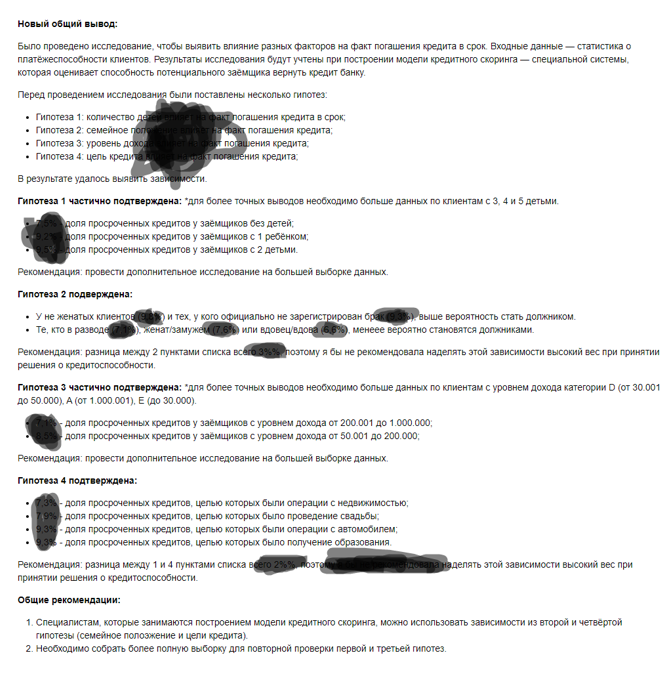

<div style="background: #B0E0E6; padding: 5px; border: 1px solid SteelBlue; border-radius: 5px;">
    <font color='4682B4'><u><b>Новый финальный вывод: </b></u></font>
    
На основании предоставленных банком данных о кредитных исторях заемщиков было проведено исследование с целью установления зависимости погашения кредитов в срок в зависимости от различных факторов. Результаты исследования предназначены для построения банковского скоринга - системы, которая оценивает возможности заемщика вернуть кредит в срок. 
    
<b>В ходе работы были выдвинуты несколько гипотез: </b> 
    
1. Существует ли зависимость между количеством детей и возвратом кредита в срок;
2. Существует ли зависимость между семейным положением и возвратом кредита в срок;
3. Существует ли зависимость между уровнем дохода и возвратом кредита в срок;
4. Существует ли зависимость от цели кредита на его возврат в срок.

После проведения исследования удалось выявить следующие закономерности и сделать выводы:
    
<b>Гипотеза 1 частично подтверждена:</b>
    
- должники с одним ребенком составляют 9,3%
- должники с тремя детьми составляют 8,2%    
- должники без детей составляют 7,5%
    
    Рекомендации:    
1. Разница должников в категориях составляет 1-2%, следовательно, не является значительной при построении банковского скоринга.           
2. В категории заемщиков с 4 и 5 детьми для проведения более точного исследования требуется больше входных данных.
    
<b>Гипотеза 2 подтверждена:</b>
    
Больше всего должников в категориях "Не женат / не замужем" (9,8%) и "гражданский брак" (9,3%). Причина может быть в том, что данный семейный статус является менее стабильным, чем официально оформленные отношения.
    
Процент должников в следующих категориях меньше и вариируется на уровне 7%: "женат / замужем" - 7,6% , "в разводе" - 7,1%,  "вдовец / вдова" - 6,6%
    
Рекомендации: 
    
1. Разница должников в категориях составляет 1-2%, следовательно, не является значительной при построении банковского скоринга.

2. В категориях "в разводе", "вдовец / вдова" для проведения более точного исследования желательно больше входных данных.
    
<b>Гипотеза 3 частично подтверждена:</b>
- в категории "С" 50001–200000 8,5% должников
- в категории "В" 200001–1000000 7,1% должников

Рекомендации: для категорий "E" 0–30000,   "А" 1000001 и выше, "D" 30001–50000 требуется больше входных данных для проведения анализа.
    
<b>Гипотеза 4 подтверждена:</b>

Наибольшее количество должников в категориях:
- "операции с автомобилем" - 9,4%
- "получение образования" - 9,3%

На 2 процентных пункта меньше в категориях:
- "проведение свадьбы" - 8%
- "операции с недвижимостью" - 7,3% 

Рекомендации: разница должников в категориях составляет 1-2%, следовательно, не является значительной при построении банковского скоринга. 

<div class="alert alert-success">
<b>КОММЕНТАРИЙ V2</b>

Ну даже и добавить-то собственно и нечего. Молодец, всё чётко, без воды, по делу и с подтверждением цифрами.
</div>

# Результат ревью:

Использование механизмов группировки данных (groupby) и/или создания сводных таблиц (pivot_table) является рекомендуемым и обязательным в работе любого аналитика данных и любого проекта. Для экспертного совершенствования в использовании groupby, понимании расширенных концептов использования pivot_table, crosstab и далее я очень рекомендую тебе обратить внимание на следующий ресурс: https://dfedorov.spb.ru/pandas/. Рекомендуемые темы/уроки для освоения тем выше - на скрине ниже.

С комментированием никаких проблем нет. Твоих объяснений достаточно для понимания твоими коллегами хода мыслей.
 
Зелёным цветом я отметил и прокомментировал удачные и элегантные решения, на которые ты можешь опираться в будущих проектах.

Однако есть принципиальные моменты, которые не позволяют мне принять твой проект в его нынешнем состоянии:

<div class="alert alert-danger">
<b>Необходимо исправить ❌</b> 

- Уточни расчеты и выводы по всем заданиям проекта.

- "Докрути" ответ на вопрос "Приведите возможные причины появления пропусков в исходных данных".
    
- Финальный вывод в таком виде - это не то, что заказчик ждет от аналитика данных. Профессионал обязан предоставить точные, четкие и корректные **прогнозы и рекомендации**, которые помогут твоей компании в реализации скорингового алгоритма. Здесь, в финальном выводе требуется максимально подробно и с цифрами описать все те инсайды в данных, которые были обнаружены в ходе выполнения проекта.</div>

Эти моменты требуют твоего внимания. Комментарии помечены красным цветом. 

Подводя итог: после доработки обязательно проверь комментарии и выводы. Их нужно будет скорректировать. Жду доработанную версию проекта на повторное ревью.

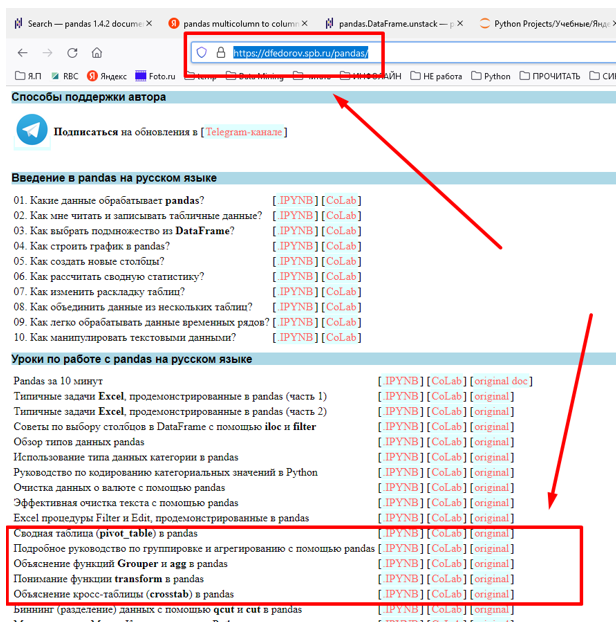